In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import random
import matplotlib.pyplot as plt
import time

In [2]:
# Pre-processing
OpenFile = pd.read_csv('diabetes.csv')
FirstTen = OpenFile.head(10)
print(FirstTen)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [3]:
# Display Information of our Data
CheckData = OpenFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Check empty cells
CheckNull = OpenFile.isnull().sum()
print(CheckNull)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Check Duplicates
ShowDuplicates = OpenFile.duplicated().sum()
print(ShowDuplicates)

0


In [6]:
OpenFile.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


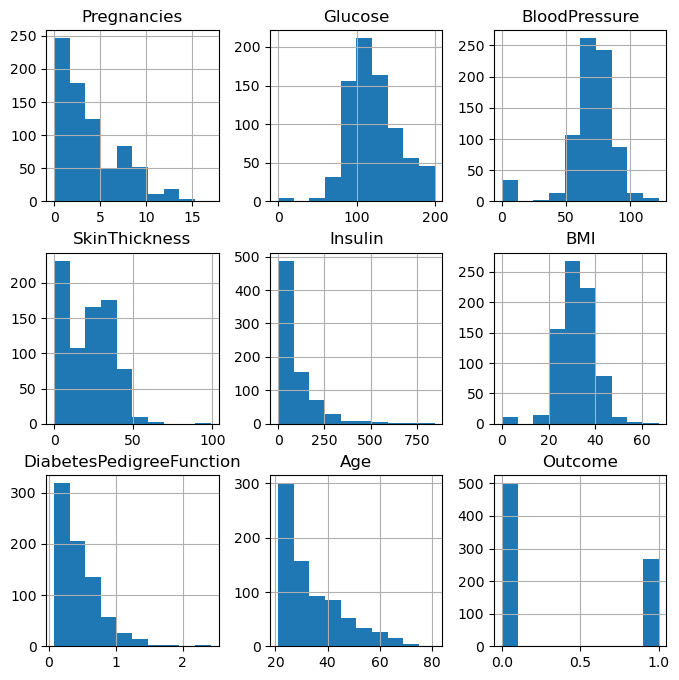

In [8]:
#histogram
OpenFile.hist(bins=10,figsize=(8,8))
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

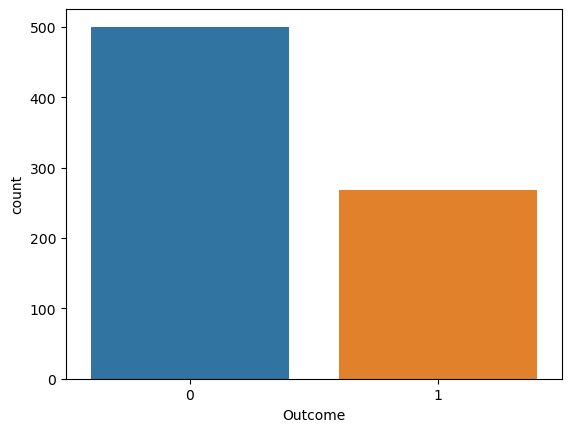

In [10]:
import seaborn as sns
# count patient with diabtes and with no diabetes
sns.countplot(x ='Outcome',data = OpenFile)

In [11]:
Pregnancies = OpenFile.iloc[:, :1].values
Glucose = OpenFile.iloc[:, 1:2].values
BloodPressure = OpenFile.iloc[:, 2:3].values
SkinThickness = OpenFile.iloc[:, 3:4].values
Insulin = OpenFile.iloc[:, 4:5].values
BMI = OpenFile.iloc[:, 5:6].values
DiabetesPedigreeFunction = OpenFile.iloc[:, 6:7].values
Age = OpenFile.iloc[:, 7:8].values
Outcome = OpenFile.iloc[:, -1:].values

C:\Users\o3006\AppData\Local\Temp\ipykernel_21744\3377872274.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(151)
C:\Users\o3006\AppData\Local\Temp\ipykernel_21744\3377872274.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(153)


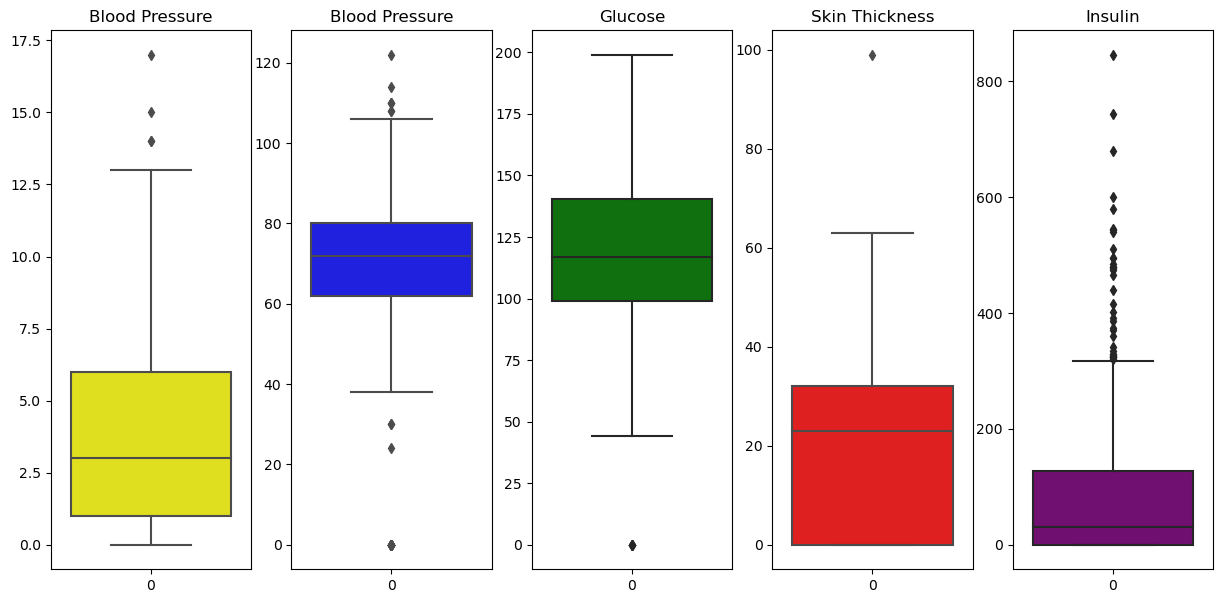

In [23]:
# Check Outliers in Group A
plt.subplots(2,2,figsize=(15,7))
plt.subplot(151)
sns.boxplot(Pregnancies, color="yellow").set_title("Blood Pressure")
plt.subplot(152)
sns.boxplot(BloodPressure, color="blue").set_title("Blood Pressure")
plt.subplot(153)
sns.boxplot(Glucose, color="green").set_title("Glucose")
plt.subplot(154)
sns.boxplot(SkinThickness, color="red").set_title("Skin Thickness")
plt.subplot(155)
sns.boxplot(Insulin, color="purple").set_title("Insulin")

plt.show()

C:\Users\o3006\AppData\Local\Temp\ipykernel_21744\1199493736.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


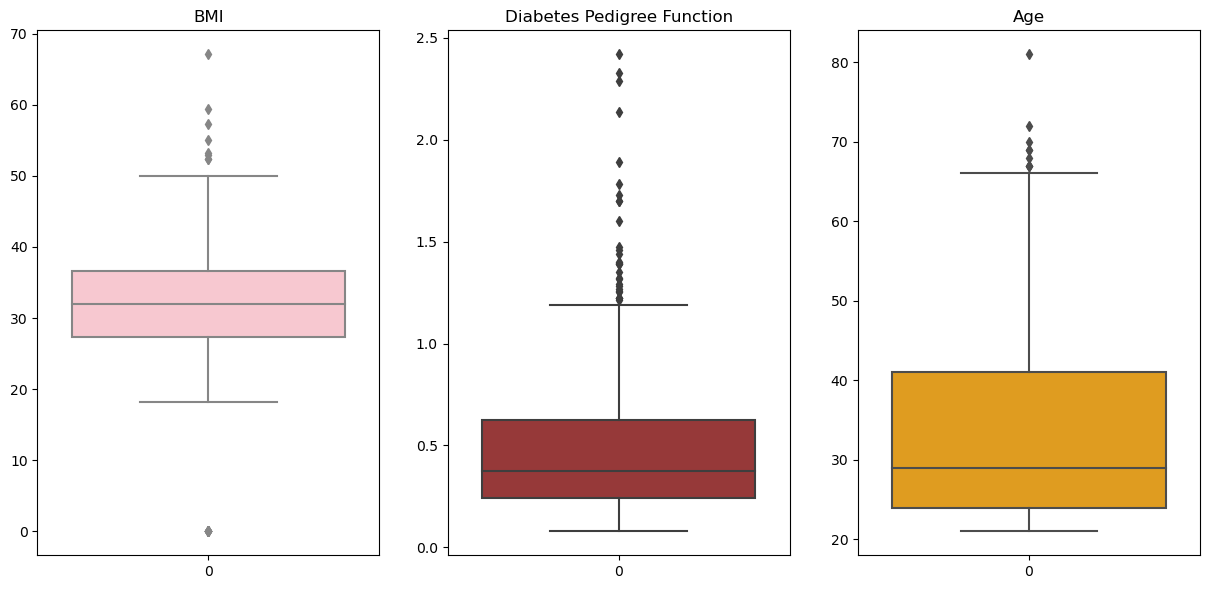

In [24]:
# Check Outliers in Group B
plt.subplots(1,1,figsize=(15,15))

plt.subplot(231)
sns.boxplot(BMI, color="pink").set_title("BMI")
plt.subplot(232)
sns.boxplot(DiabetesPedigreeFunction, color="brown").set_title("Diabetes Pedigree Function")
plt.subplot(233)
sns.boxplot(Age, color="orange").set_title("Age")
plt.show()

In [13]:
# Function to read CSV file
def read_data(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y

In [14]:
# Function to generate initial population
def initialize_population(population_size, max_depth):
    population = []
    for _ in range(population_size):
        tree = DecisionTreeClassifier(max_depth=max_depth)
        population.append(tree)
    return population

In [15]:
# Fitness_function and evaluation
def Fitness_function(tree, X_train, y_train, X_test, y_test):
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    confusion = confusion_matrix(y_test, predictions)
    return accuracy, precision, recall, confusion

In [16]:
# TournamentSelection
def TournamentSelection(population, fitness_Scores, tournament_size):
    selected = []
    for _ in range(len(population)):
        participants = random.sample(range(len(population)), tournament_size)
        winning_indi = max(participants, key=lambda x: fitness_Scores[x])
        selected.append(population[winning_indi])
    return selected

In [17]:
# Crossover
def crossover(parent1, parent2):
    tree1 = parent1.tree_
    tree2 = parent2.tree_
    nodes1 = np.random.randint(0, tree1.node_count)
    nodes2 = np.random.randint(0, tree2.node_count)
    child1 = DecisionTreeClassifier(max_depth=parent1.max_depth)
    child2 = DecisionTreeClassifier(max_depth=parent2.max_depth)
    child1.tree_ = subtrees(tree1, nodes1, tree2, nodes2)
    child2.tree_ = subtrees(tree2, nodes2, tree1, nodes1)
    return child1, child2, nodes1, nodes2

In [18]:
def subtrees(tree1, node1, tree2, node2):
    temp = tree1.children_left[node1]
    tree1.children_left[node1] = tree2.children_left[node2]
    tree2.children_left[node2] = temp
    temp = tree1.children_right[node1]
    tree1.children_right[node1] = tree2.children_right[node2]
    tree2.children_right[node2] = temp
    return tree1

In [19]:
# Mutation
def mutation(tree, mutation_rate):
    if random.uniform(0, 1) < mutation_rate:
        node_to_mutate = np.random.randint(0, tree.tree_.node_count)
        if random.uniform(0, 1) < 0.5:
            tree.tree_.children_left[node_to_mutate] = np.random.randint(0, tree.tree_.node_count)
        else:
            tree.tree_.children_right[node_to_mutate] = np.random.randint(0, tree.tree_.node_count)
    return tree

In [20]:
# Generate new generation
def newGen(population, fitness_Scores, tournament_size, mutation_rate):
    new_generation = TournamentSelection(population, fitness_Scores, tournament_size)
    parents_indices = []
    children = []
    for _ in range(len(new_generation)//2):
        parent_indices = random.sample(range(len(new_generation)), 2)
        parents_indices.append(parent_indices)
        parent1, parent2 = new_generation[parent_indices[0]], new_generation[parent_indices[1]]
        child1, child2, parent1_node, parent2_node = crossover(parent1, parent2)
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)
        children.append((child1, child2, parent1_node, parent2_node))
    return new_generation, parents_indices, children

In [21]:
# Main function
def genetic_Pro(X, y, max_depth, population_size, tournament_size, mutation_rate, generations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    population = initialize_population(population_size, max_depth)
    gen_fitness = []
    gen_accuracy = []
    gen_precision = []
    gen_sensitivity = []
    gen_parents = []
    gen_children = []
    

    for generation in range(generations):
        start_time = time.time()

        fitness_Scores = []
        precisions = []
        sensitivities = []
        conf_matrices = []
        for tree in population:
            accuracy, precision, sensitivity, confusion = Fitness_function(tree, X_train, y_train, X_test, y_test)
            fitness_Scores.append(accuracy)
            precisions.append(precision)
            sensitivities.append(sensitivity)
            conf_matrices.append(confusion)

        average_fitness = np.mean(fitness_Scores)
        average_precision = np.mean(precisions)
        average_sensitivity = np.mean(sensitivities)
        best_accuracy = max(fitness_Scores)
        best_tree_index = fitness_Scores.index(best_accuracy)
        best_tree = population[best_tree_index]
        print(f"Generation {generation}: \nAverage Fitness:\t\t {average_fitness}, \nBest Accuracy:\t\t\t {best_accuracy}, "
              f"\nAverage Precision:\t\t {average_precision}, \nAverage Sensitivity:\t\t {average_sensitivity}")

        gen_fitness.append(average_fitness)
        gen_accuracy.append(best_accuracy)
        gen_precision.append(average_precision)
        gen_sensitivity.append(average_sensitivity)

        population, parents, children = newGen(population, fitness_Scores, tournament_size, mutation_rate)
        gen_parents.append(parents)
        gen_children.append(children)

        end_time = time.time()
        print(f"Time taken for generation {generation}: \t {end_time - start_time} seconds\n")

    # Plotting results
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(range(generations), gen_fitness, label='Average Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Average Fitness')
    plt.title('Average Fitness over Generations')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(range(generations), gen_accuracy, label='Best Accuracy')
    plt.xlabel('Generation')
    plt.ylabel('Best Accuracy')
    plt.title('Best Accuracy over Generations')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(range(generations), gen_precision, label='Average Precision')
    plt.xlabel('Generation')
    plt.ylabel('Average Precision')
    plt.title('Average Precision over Generations')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(range(generations), gen_sensitivity, label='Average Sensitivity')
    plt.xlabel('Generation')
    plt.ylabel('Average Sensitivity')
    plt.title('Average Sensitivity over Generations')
    plt.legend()

    plt.tight_layout()
    
    # Plotting results
    plt.figure(figsize=(10, 3))
    plt.plot(range(generations), gen_fitness, label='Average Fitness')
    plt.plot(range(generations), gen_accuracy, label='Best Accuracy')
    plt.plot(range(generations), gen_precision, label='Average Precision')
    plt.plot(range(generations), gen_sensitivity, label='Average Sensitivity')
    plt.xlabel('Generations')
    plt.ylabel('Metrics')
    plt.title('Decision Tree Classifier Results')
    plt.legend()
    plt.show()

    # Printing parents and children
    for gen in range(generations):
        print(f"Generation {gen}:")
        for i, (parent1_idx, parent2_idx) in enumerate(gen_parents[gen]):
            parent1 = population[parent1_idx]
            parent2 = population[parent2_idx]
            print(f"Parent {i + 1}: Fitness - {fitness_Scores[parent1_idx]}")
            print(f"Parent {i + 2}: Fitness - {fitness_Scores[parent2_idx]}")
            child1, child2, parent1_node, parent2_node = gen_children[gen][i]
            print(f"Child {i + 1}: Fitness - {Fitness_function(child1, X_train, y_train, X_test, y_test)[0]},"
                  f"\nPrecision - {Fitness_function(child1, X_train, y_train, X_test, y_test)[1]},"
                  f"\nSensitivity - {Fitness_function(child1, X_train, y_train, X_test, y_test)[2]},"
                  f"\nParent nodes - {parent1_node}, {parent2_node}\n")
            
            print(f"\nChild {i + 2}: \nFitness - {Fitness_function(child2, X_train, y_train, X_test, y_test)[0]}, "
                  f"\nPrecision - {Fitness_function(child2, X_train, y_train, X_test, y_test)[1]},"
                  f"\nSensitivity - {Fitness_function(child2, X_train, y_train, X_test, y_test)[2]},"
                  f"\nParent nodes - {parent2_node}, {parent1_node}\n")
            
    total_fitness = 0
    Av_total_fitness = 0
    
    total_Accuracy = 0
    Av_gen_accuracy = 0
    
    total_precision = 0
    Av_gen_precision = 0
    
    for m in range(generation):
        total_fitness += gen_fitness[m]
    
    Av_total_fitness = (total_fitness * 100) / generation
    print("Avarage Fitness for all generations: ", Av_total_fitness)
    
    for a in range(generation):
        total_Accuracy += gen_accuracy[a]
    
    Av_gen_accuracy = (total_Accuracy * 100) / generation
    print("Avarage Accuracy for all generations: ", Av_gen_accuracy)
    
    for p in range(generation):
        total_precision += gen_precision[p]
    
    Av_gen_precision = (total_precision * 100) / generation
    print("Avarage precision for all generations: ", Av_gen_precision)
    
    
    return best_tree


Generation 0: 
Average Fitness:		 0.7948051948051947, 
Best Accuracy:			 0.8116883116883117, 
Average Precision:		 0.650617748653463, 
Average Sensitivity:		 0.7085106382978723
Time taken for generation 0: 	 0.06749939918518066 seconds

Generation 1: 
Average Fitness:		 0.7896103896103897, 
Best Accuracy:			 0.8116883116883117, 
Average Precision:		 0.6426063738109619, 
Average Sensitivity:		 0.7
Time taken for generation 1: 	 0.0816960334777832 seconds

Generation 2: 
Average Fitness:		 0.7857142857142858, 
Best Accuracy:			 0.8116883116883117, 
Average Precision:		 0.6337543234854159, 
Average Sensitivity:		 0.7063829787234043
Time taken for generation 2: 	 0.06268191337585449 seconds

Generation 3: 
Average Fitness:		 0.7902597402597402, 
Best Accuracy:			 0.8181818181818182, 
Average Precision:		 0.6413964877150227, 
Average Sensitivity:		 0.7106382978723405
Time taken for generation 3: 	 0.08241486549377441 seconds

Generation 4: 
Average Fitness:		 0.7831168831168831, 
Best Accur

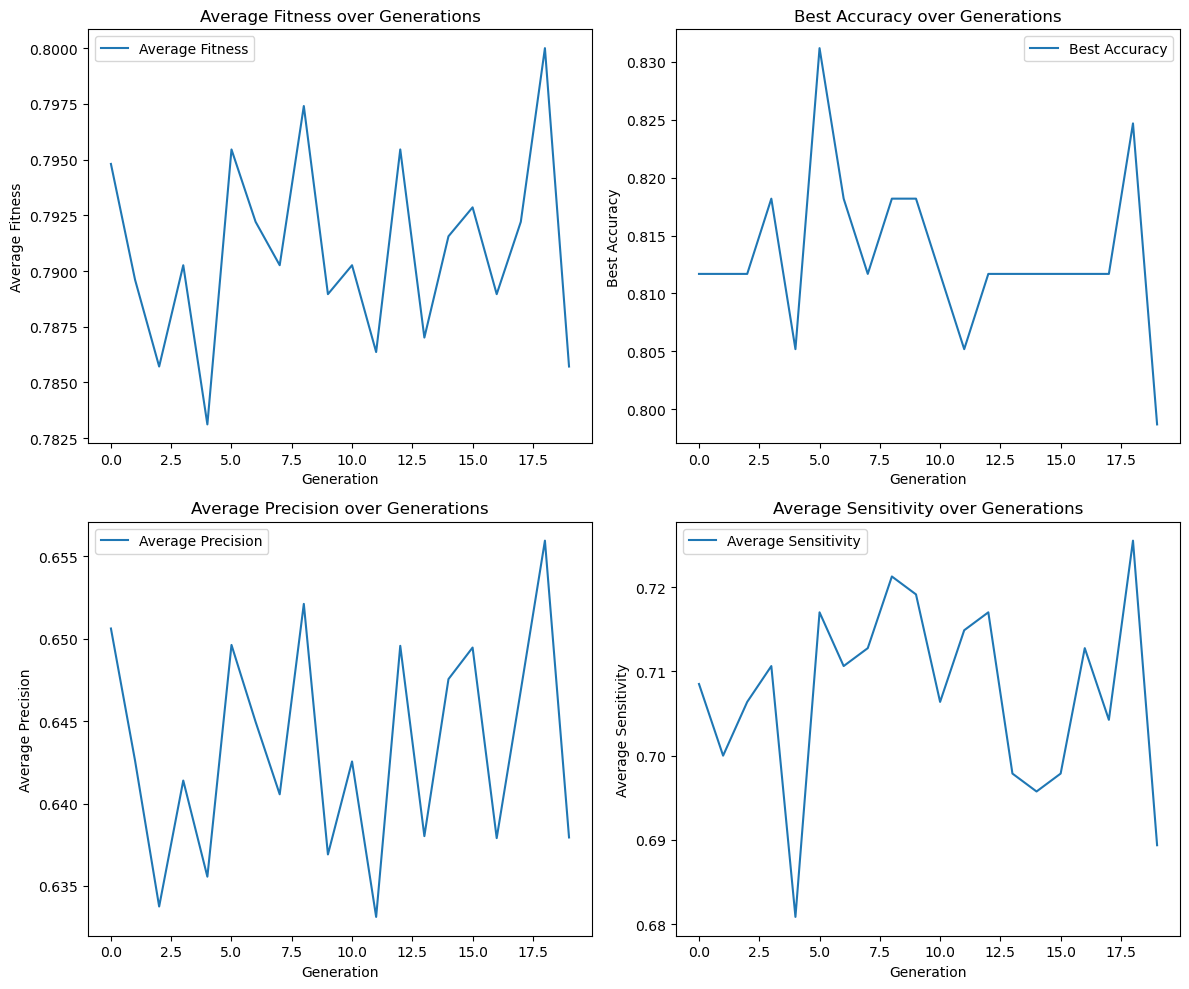

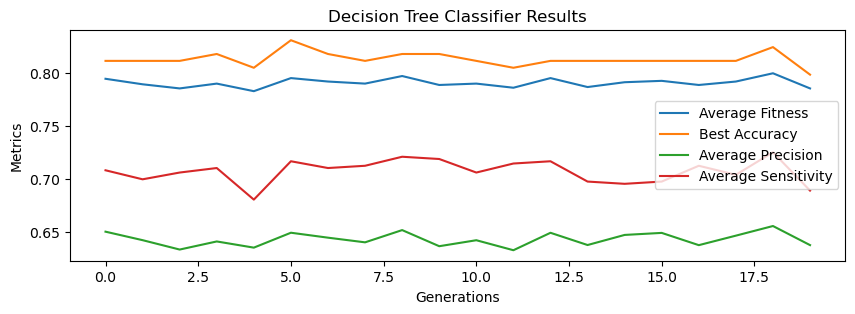

Generation 0:
Parent 1: Fitness - 0.7987012987012987
Parent 2: Fitness - 0.7727272727272727
Child 1: Fitness - 0.8051948051948052,
Precision - 0.6530612244897959,
Sensitivity - 0.723404255319149,
Parent nodes - 24, 152


Child 2: 
Fitness - 0.7792207792207793, 
Precision - 0.6862745098039216,
Sensitivity - 0.6808510638297872,
Parent nodes - 152, 24

Parent 2: Fitness - 0.7792207792207793
Parent 3: Fitness - 0.7922077922077922
Child 2: Fitness - 0.7727272727272727,
Precision - 0.6545454545454545,
Sensitivity - 0.723404255319149,
Parent nodes - 153, 174


Child 3: 
Fitness - 0.7857142857142857, 
Precision - 0.6481481481481481,
Sensitivity - 0.7446808510638298,
Parent nodes - 174, 153

Parent 3: Fitness - 0.7792207792207793
Parent 4: Fitness - 0.7857142857142857
Child 3: Fitness - 0.7662337662337663,
Precision - 0.6346153846153846,
Sensitivity - 0.7021276595744681,
Parent nodes - 84, 100


Child 4: 
Fitness - 0.7922077922077922, 
Precision - 0.6730769230769231,
Sensitivity - 0.74468085106

Child 3: Fitness - 0.7987012987012987,
Precision - 0.6326530612244898,
Sensitivity - 0.7021276595744681,
Parent nodes - 59, 152


Child 4: 
Fitness - 0.8181818181818182, 
Precision - 0.6346153846153846,
Sensitivity - 0.723404255319149,
Parent nodes - 152, 59

Parent 4: Fitness - 0.7792207792207793
Parent 5: Fitness - 0.7792207792207793
Child 4: Fitness - 0.8051948051948052,
Precision - 0.6415094339622641,
Sensitivity - 0.7021276595744681,
Parent nodes - 81, 111


Child 5: 
Fitness - 0.7922077922077922, 
Precision - 0.6538461538461539,
Sensitivity - 0.6595744680851063,
Parent nodes - 111, 81

Parent 5: Fitness - 0.7792207792207793
Parent 6: Fitness - 0.7922077922077922
Child 5: Fitness - 0.7987012987012987,
Precision - 0.6666666666666666,
Sensitivity - 0.6808510638297872,
Parent nodes - 102, 5


Child 6: 
Fitness - 0.8116883116883117, 
Precision - 0.6792452830188679,
Sensitivity - 0.7659574468085106,
Parent nodes - 5, 102

Generation 6:
Parent 1: Fitness - 0.7792207792207793
Parent 2: F


Child 2: 
Fitness - 0.7792207792207793, 
Precision - 0.6,
Sensitivity - 0.6382978723404256,
Parent nodes - 14, 63

Parent 2: Fitness - 0.7922077922077922
Parent 3: Fitness - 0.7857142857142857
Child 2: Fitness - 0.7792207792207793,
Precision - 0.6470588235294118,
Sensitivity - 0.7446808510638298,
Parent nodes - 142, 32


Child 3: 
Fitness - 0.8116883116883117, 
Precision - 0.6666666666666666,
Sensitivity - 0.6808510638297872,
Parent nodes - 32, 142

Parent 3: Fitness - 0.7727272727272727
Parent 4: Fitness - 0.7792207792207793
Child 3: Fitness - 0.7662337662337663,
Precision - 0.6530612244897959,
Sensitivity - 0.7021276595744681,
Parent nodes - 80, 156


Child 4: 
Fitness - 0.8051948051948052, 
Precision - 0.6538461538461539,
Sensitivity - 0.6595744680851063,
Parent nodes - 156, 80

Parent 4: Fitness - 0.7857142857142857
Parent 5: Fitness - 0.7922077922077922
Child 4: Fitness - 0.7727272727272727,
Precision - 0.6226415094339622,
Sensitivity - 0.7659574468085106,
Parent nodes - 89, 63




Child 5: 
Fitness - 0.7532467532467533, 
Precision - 0.6071428571428571,
Sensitivity - 0.6808510638297872,
Parent nodes - 151, 152

Parent 5: Fitness - 0.7727272727272727
Parent 6: Fitness - 0.7792207792207793
Child 5: Fitness - 0.7792207792207793,
Precision - 0.6545454545454545,
Sensitivity - 0.7659574468085106,
Parent nodes - 37, 184


Child 6: 
Fitness - 0.7792207792207793, 
Precision - 0.6862745098039216,
Sensitivity - 0.7021276595744681,
Parent nodes - 184, 37

Generation 17:
Parent 1: Fitness - 0.7792207792207793
Parent 2: Fitness - 0.7857142857142857
Child 1: Fitness - 0.8051948051948052,
Precision - 0.6415094339622641,
Sensitivity - 0.723404255319149,
Parent nodes - 8, 55


Child 2: 
Fitness - 0.7662337662337663, 
Precision - 0.6181818181818182,
Sensitivity - 0.6808510638297872,
Parent nodes - 55, 8

Parent 2: Fitness - 0.7922077922077922
Parent 3: Fitness - 0.7922077922077922
Child 2: Fitness - 0.8051948051948052,
Precision - 0.6226415094339622,
Sensitivity - 0.70212765957446

In [22]:
# Example usage
if __name__ == "__main__":
    file_path = "diabetes.csv"
    X, y = read_data(file_path)
    max_depth = 10
    population_size = 10
    tournament_size = 5
    mutation_rate = 0.1
    generations = 20

    best_tree = genetic_Pro(X, y, max_depth, population_size, tournament_size, mutation_rate, generations)